In [1]:
import sys
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/')
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/rl2')
from plots import compare_llm_uniform_data_samples
import pandas as pd

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
llama_gen_tasks = pd.read_csv('../data/gpt3_generated_tasks_paramsNA_dim3_data100_tasks135.csv')#temp/llama_generated_tasks_params65B_dim3_data8_tasks500_run0_procid0.csv')
llama_gen_tasks = llama_gen_tasks.query('target == "A" or target == "B"')
random=False

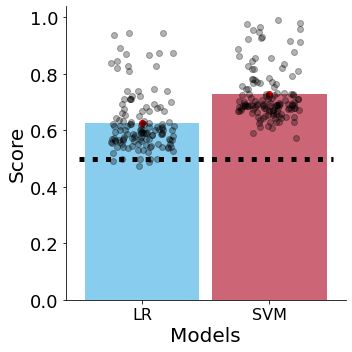

In [3]:
compare_llm_uniform_data_samples(llama_gen_tasks, random)